# A1_노선호_통계1일차

## p.25 [실습] 기술통계 분석

In [ ]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

In [ ]:
matplotlib.rc('font', family="Malgun Gothic")
plt.rc('font', family = 'Malgun Gothic')


In [ ]:
ds_mycars = pd.read_csv("/home/piai/Downloads/week2/mycars.csv",engine='python')
ds_mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [ ]:
ds_mycars.describe().round(3)

,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


In [ ]:
df = ds_mycars[['highway_mileage','mpg']]
df.head()

,highway_mileage,mpg
0,29,18
1,29,21
2,31,20
3,30,21
4,26,16


In [ ]:
ds_mycars.groupby('driving').describe().round(3)

displacement                                          year            \
               count   mean    std  min  25%  50%  75%  max  count      mean   
driving                                                                        
4              103.0  3.998  1.139  1.8  2.9  4.0  4.7  6.5  103.0  2003.718   
f              106.0  2.558  0.701  1.6  2.0  2.4  3.0  5.3  106.0  2003.160   
r               25.0  5.176  0.803  3.8  4.6  5.4  5.7  7.0   25.0  2004.040   

         ...   mpg       highway_mileage                                   \
         ...   75%   max           count    mean    std   min   25%   50%   
driving  ...                                                                
4        ...  16.0  21.0           103.0  19.175  4.079  12.0  17.0  18.0   
f        ...  21.0  35.0           106.0  28.160  4.207  17.0  26.0  28.0   
r        ...  15.0  18.0            25.0  21.000  3.663  15.0  17.0  21.0   

                     
          75%   max  
driving              
4        22.0  28.0  
f        29.0  44.0  
r        24.0  26.0  

[3 rows x 40 columns]

# p.28 [실습] 기술통계

In [ ]:
ds_Exh_QC1 = pd.read_csv("/home/piai/Downloads/week2/mycars.csv", engine="python")
df = ds_Exh_QC1[['driving']]

df.head()

,driving
0,f
1,f
2,f
3,f
4,f


In [ ]:
count = df['driving'].value_counts().sort_index()

cumcnt=np.cumsum(count)

percent = count/ sum(count)* 100

cumpct = np.cumsum(percent)

In [ ]:
count_data = pd.DataFrame({'Count':count,'CumCnt':cumcnt,'Percent':percent,'Cumpct':cumpct})


In [ ]:
count_data.columns.name="driving"

In [ ]:
count_data

driving,Count,CumCnt,Percent,Cumpct
4,103,103,44.017094,44.017094
f,106,209,45.299145,89.316239
r,25,234,10.683761,100.000000


# p.43 [실습] 정규분포의 확률계산

In [ ]:
mu = 175
sigma =5
x=180
prob = stats.norm.cdf(x,mu,sigma)
print("{0}cm 일 경우 위치하는 범위: {1:.1f}%".format(x,(1-prob)*100))

180cm 일 경우 위치하는 범위: 15.9%


# p.45 [실습] 정규분포의 확률계산

In [ ]:
mu = 12
sigma = 3
x1 = 15

prob1= stats.norm.cdf(x1,mu,sigma)
print("1) {0}km 이상 {1} 이하를 달릴 확률은 {2:.1f}%에 해당함".format(mu,x1,(2*(prob1-0.5))*100))
print("2) {0}km 이상 달릴 확률은 {1:.1f}%에 해당함".format(mu,x1,(1-prob1)))

1) 12km 이상 15 이하를 달릴 확률은 68.3%에 해당함
2) 12km 이상 달릴 확률은 15.0%에 해당함


# p.54 [실습] t분포

In [ ]:
t= 2.0
df=100
prob = stats.t.cdf(t,df)
print("P(T<=F): {:.3f}".format(prob))


P(T<=F): 0.976


# p.58 [실습] 카이제곱 분포 

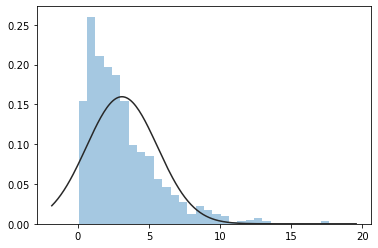

In [ ]:
np.random.seed(seed=1234)
chisq_df40 = np.random.chisquare(df = 3 , size = 1000)
sns.distplot(chisq_df40, fit = stats.norm , kde = False)

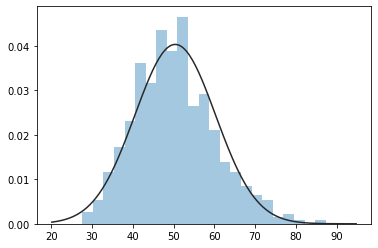

In [ ]:
np.random.seed(seed=1234)
chisq_df40 = np.random.chisquare(df = 50 , size = 1000)
sns.distplot(chisq_df40, fit = stats.norm , kde = False)

# p.60 [실습] 카이제곱 분포 

In [ ]:
chisq =8
df = 3.0
prob =stats.chi2.cdf(chisq, df)
print("P(X<={0}: {1:4f}".format(chisq,prob))

P(X<=8: 0.953988


# p.64 [실습] F-분포

In [ ]:
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(x=f , dfn=dfnum , dfd = dfden)
print("P(X<=F): {:.3f}".format(prob))

P(X<=F): 0.850
